# Part I - (Ford Go Bike System Data)
## by (Tony Ezepue)

## Introduction
> The data consists of information regarding 183,412 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, and some additional variables


## Preliminary Wrangling


In [146]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [147]:
#load the dataset
df1 = pd.read_csv('201902-fordgobike-tripdata.csv')
#view the first 7 dataset
df1.head(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No


In [148]:
df1.info(),df.shape
df=df1.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [149]:

#converting start_time and end_time to datetime format
df1['start_time']=pd.to_datetime(df1['start_time'])
df1['end_time']=pd.to_datetime(df1['end_time'])


In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [151]:
df1.dropna(inplace=True)
#dropping all nan values in the dataset



In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [153]:
#importing datetime library
import datetime as dt


In [154]:
#extract from start time the day,month,hour and year
df1['start_day'] = df1['start_time'].dt.day_name()
df1['start_month'] = df1['start_time'].dt.month_name()
df1['start_year'] = df1['start_time'].dt.year
df1['start_hour'] = df1['start_time'].dt.hour

In [155]:
#extract from end time the day,month,hour and year
df1['end_day'] = df1['end_time'].dt.day_name()
df1['end_month'] = df1['end_time'].dt.month_name()
df1['end_year'] = df1['end_time'].dt.year
df1['end_hour'] = df1['end_time'].dt.hour

In [156]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hour,end_day,end_month,end_year,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,2019,17,Friday,March,2019,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,2019,12,Friday,March,2019,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,2019,17,Friday,March,2019,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,2019,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0


### What is the structure of your dataset?

> 174952 rows and 24 columns

### What is/are the main feature(s) of interest in your dataset?

> find most used station and gender that subcribe the most

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The datetime i extracted from start time and end time

## Univariate Exploration

 


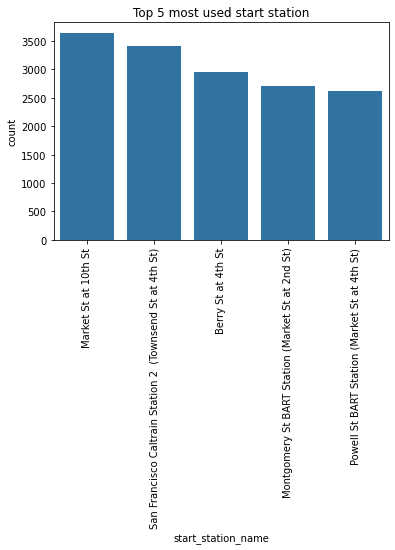

In [157]:
#The first five most used start station
values = df1.start_station_name.value_counts().head().index
base_color= sns.color_palette()[0]
sns.countplot(data=df1,x='start_station_name',order=values,color=base_color)
plt.title('Top 5 most used start station')
plt.xticks(rotation=90);

## most used start station is Market St at 10th St     

In [158]:
def countplot():
    values = df1.end_station_name.value_counts().head().index
    base_color= sns.color_palette()[0]
    sns.countplot(data=df1,x='end_station_name',order=values,color=base_color)
    plt.title('Top 5 most used end station')
    plt.xticks(rotation=90);
    

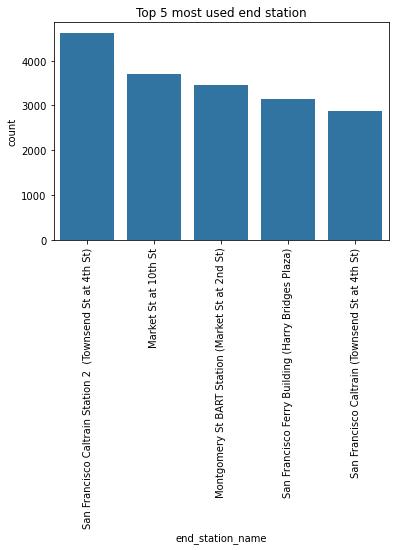

In [159]:
countplot()

## most used end station is San Francisco Caltrain Station 2  (Townsend St at 4th St)

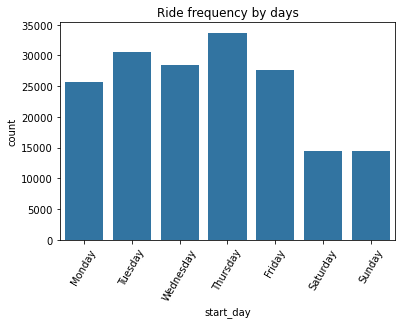

In [160]:
days_list=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days_classes = pd.api.types.CategoricalDtype(ordered=True,categories=days_list)
df1['start_day'] = df1['start_day'].astype(days_classes)
base_color= sns.color_palette()[0]
sns.countplot(data=df1,x='start_day',color=base_color)
plt.title('Ride frequency by days')
plt.xticks(rotation=60);

## most rides are taken on Thursdays and Tuesdays. weekends has the lowest trip record

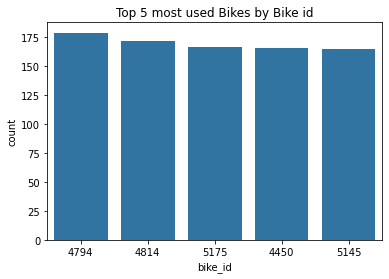

In [185]:
base_color= sns.color_palette()[0]
ordered=df1['bike_id'].value_counts().head().index
sns.countplot(data=df1,x='bike_id',color=base_color,order=ordered)
plt.title('Top 5 most used Bikes by Bike id'); 

## most used bike id is bike_id(4794) with total use of 179 times.it can be attributed that these bikes might be fast and conducive for travelling

In [ ]:
base_color= sns.color_palette()[0]
sns.countplot(data=df1,x='start_hour',color=base_color)
plt.title('Ride frequency by hours');

## The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours where people leave for work and come back later in the evening.

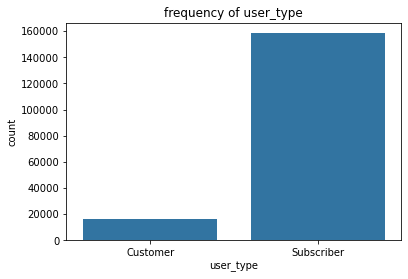

In [162]:
base_color= sns.color_palette()[0]
sns.countplot(data=df1,x='user_type',color=base_color)
plt.title('frequency of user_type'); 

## There are more subcribers than random customers

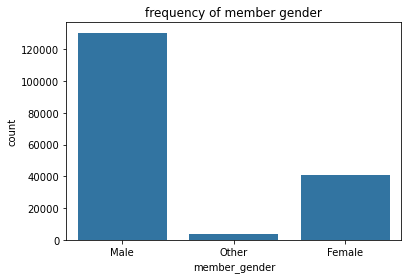

In [163]:
base_color= sns.color_palette()[0]
sns.countplot(data=df1,x='member_gender',color=base_color)
plt.title('frequency of member gender'); 

## It shows that males use bike services 3x more than females.

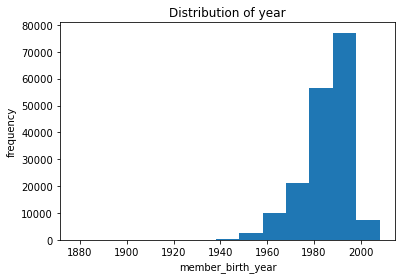

In [164]:
bins = np.arange(1878,2001+10,10)
plt.hist(data=df1,x='member_birth_year',bins=bins)
plt.title('Distribution of year')
plt.xlabel('member_birth_year')
plt.ylabel('frequency');

## bike users have high frequency between 1980 to 2000. which can be linked to young people make use of bike often then the aged.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> in getting Ride frequency for days of the week. we discovered that people use bikes mostly within the week (work days) expecially on Tuesday and Thursdays. i performed tansformation on the ordering of days to CategoricalDtype datatype.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

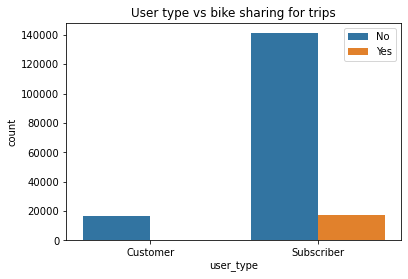

In [165]:

sns.countplot(data=df1,x='user_type',hue='bike_share_for_all_trip')
plt.title('User type vs bike sharing for trips')
plt.legend();




## we can see that its only subscribers that can be able to share their bikes

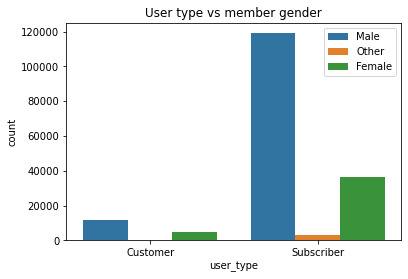

In [166]:
sns.countplot(data=df1,x='user_type',hue='member_gender')
plt.title('User type vs member gender')
plt.legend();




## boldy seen that not only that males subcribe the most 

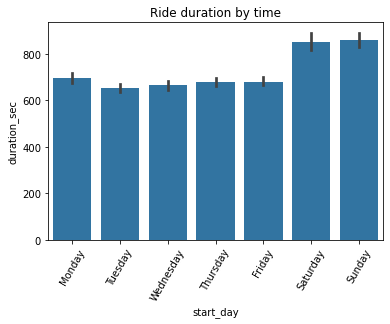

In [167]:
base_color= sns.color_palette()[0]
sns.barplot(data=df1,x='start_day',y='duration_sec',color=base_color)
plt.xticks(rotation=60)
plt.title('Ride duration by time');

## people spend more time in the weekends with bike which can attribute to a relaxation period not work days

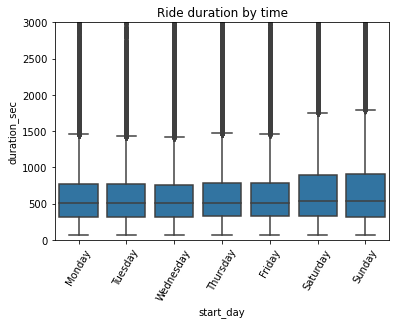

In [173]:
base_color= sns.color_palette()[0]
sns.boxplot(data=df1,x='start_day',y='duration_sec',color=base_color)
plt.xticks(rotation=60)
plt.ylim(0,3000)
plt.title('Ride duration by time');

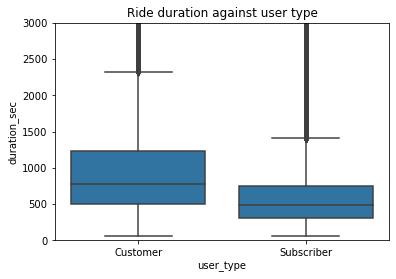

In [175]:
base_color= sns.color_palette()[0]
sns.boxplot(data=df1,x='user_type',y='duration_sec',color=base_color)
plt.ylim(0,3000)
plt.title('Ride duration against user type');

## Customer user type trips take a longer duration than subscriber user type

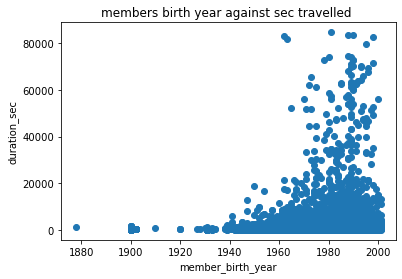

In [192]:
plt.scatter(data=df1,x='member_birth_year',y='duration_sec')
plt.xlabel('member_birth_year')
plt.ylabel('duration_sec')
plt.title('members birth year against sec travelled '); 

## it can be seen in our plot that birth year of 1880-1940 travelled less than 10000sec and 1941-1960 travels less than 20000sec while from 1961-2001 travels full distance of 80000sec.This can be attributed to young people have strenght of covering long distances compared to mid aged and old persons.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> i observed that young persons cover more distance than the middle aged and elderly people who still use bikes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Relationship between days of the week and hours covered

## Multivariate Exploration

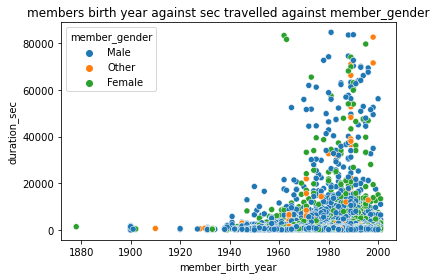

In [198]:
sns.scatterplot(data=df1,x='member_birth_year',y='duration_sec',hue='member_gender')
plt.title('members birth year against sec travelled against member_gender');

## its clear that the highest seconds travelled was covered equally by all genders. 

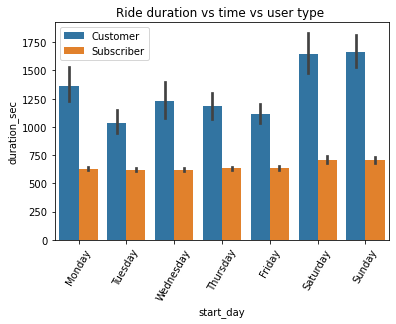

In [203]:
# base_color= sns.color_palette()[0]
sns.barplot(data=df1,x='start_day',y='duration_sec',hue='user_type')
plt.xticks(rotation=60)
plt.title('Ride duration vs time vs user type ')
plt.legend();

## Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with little increase on weekends but not up to that of the customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> relationship between members birth year and duration sec against user type.

### Were there any interesting or surprising interactions between features?

> Yes.

## Conclusions
* The higher ride frequencies for the morning (8th and 9th hrs) and evening (17th and 18th hrs) can be linked to rush hours   where people leave for work and come back later in the evening.
* Weekend trips take a longer duration as compared to trips taken during the week.
* Customer user type trips take a longer duration compared to subscriber user type.
* Weekend trips take a longer duration as compared to trips taken during the week.
* Both male,female and other covered equal distance by seconds spent with the bike.
* old people travel less in terms of seconds compared to young persons.
